In [27]:
import pandas as pd
import numpy as np

In [28]:
df=pd.read_csv("data/2_resampled_heart_attack_data.csv")

In [29]:
df.head()

,Sex,Cholesterol,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,...,Triglycerides,Activity per Week,Sleeping Hours,Country,Systolic,Diastolic,Age_HeartRate,Obesity_SedentaryHours,Continent_Hemisphere,Heart Attack Risk
0,0.72282,-0.675266,-1.245218,-0.884788,0.367132,-1.086985,-1.046511,-1.166448,-0.887506,-0.891675,...,-0.607627,-1.522480,-0.470129,-1.657057,0.900425,0.206599,0.417371,0.036539,1.944614,0
1,0.72282,1.648953,0.803072,1.130214,0.367132,0.919976,-1.468455,1.351343,1.126753,-0.891675,...,-0.843463,-1.070875,0.049169,-1.120175,1.176606,0.560205,-0.999596,-0.156546,1.029291,0
2,-1.38347,0.814289,0.803072,-0.884788,-2.723814,-1.086985,-1.420954,0.092447,1.126753,1.121485,...,0.784272,0.283939,-1.508725,-0.583293,1.531696,0.984532,-1.279301,0.880672,0.113968,0
3,0.72282,1.571907,0.803072,1.130214,0.367132,0.919976,-0.032400,-1.166448,1.126753,-0.891675,...,-0.182196,-0.167666,-1.508725,-1.120175,1.097698,1.055253,1.087434,0.342959,1.029291,0
4,0.72282,0.737243,0.803072,1.130214,0.367132,-1.086985,-0.753363,1.351343,1.126753,-0.891675,...,-0.861960,-1.070875,-0.989427,1.206314,-1.743020,0.206599,1.090508,-1.178553,-0.801355,0


In [30]:
X=df.drop(columns=['Heart Attack Risk'])
y=df['Heart Attack Risk']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model=LogisticRegression()

In [34]:
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
import numpy as np
# convert the dataframe into numpy array
X_train=np.array(X_train)
X_test=np.array(X_test)

In [36]:
y_pred=model.predict(X_test)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6017777777777777

> Approximately 60.18% of the model's predictions were accurate.

Precision: 0.603202846975089
Recall: 0.601063829787234
F1-score: 0.6021314387211367


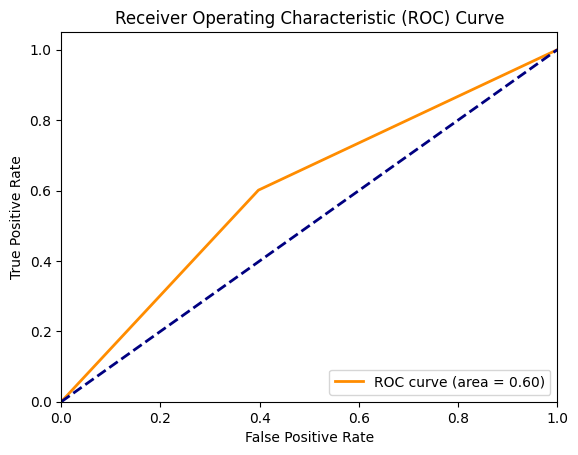

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels, respectively

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


>Precision: Precision tells us how many of the instances predicted as positive are actually positive. In this case, about 60.32% of the predicted positive instances are indeed positive.

>Recall: Recall indicates how many of the actual positive instances were correctly identified by the model. Approximately 60.11% of the actual positive instances were correctly identified by the model.

>F1-score: F1-score is the balance between precision and recall. It provides a single metric that considers both precision and recall. Your model achieved an F1-score of approximately 0.6021, indicating a balanced performance in terms of precision and recall.